# Análise sobre classificação de Panelas

<h1>Objetivo</h1>

O intuito desta análise é identificar quais os principais modelos de panelas no mercado como:

1-Principais Marcas.

2-Tipos de panelas.

3-Valores.

4-FeedBack dos clientes.

5-Qual melhor tipo de panela pra lançar

Com isso fazendo uma análise de uma possivel panela que teria um bom rendimetno no mercado em avaliações.

#### Obtenção de Dados

Os dados foram obtidos através do analista Jonas da Just a Little Data.

In [1]:
#Importando os pacotes que seram utilizados.
import pandas as pd 
import matplotlib as plt
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importação do csv
df = pd.read_csv(r'C:\Users\guilherme.berthlot\Desktop\panela.csv', sep =',')


##### Dicionaário das variaveis

•	ITEM_ID - Número de identificação do item.        
•	ALTURA - Altura da panela               
•	CAPACIDADE (L) – Capacidade da panela em litros.      
•	COMPOSICAO – Composição do tipo da panela.           
•	COR – Cor da panela.                   
•	FORMATO – Formato da panela.              
•	LARGURA – Largura da panela.              
•	MARCA – Marca da panela.                 
•	PARA_LAVA_LOUCAS – Sé é possível em máquina de lavar louça.     
•	PARA_MICRO_ONDAS – Se é possível colocar no micro-ondas.      
•	PESO – Peso da panela.                   
•	PROFUNDIDADE – Profundida da panela.          
•	TEMPO_GARANTIA – Garantida em meses.        
•	TEM_FERRO_FUNDIDO – Sé tem ferro fundido a mesma.    
•	TEM_GRELHA – Se tem grelha.           
•	TEM_TAMPA – Se tem tampa.            
•	TIPO_PRODUTO -  Tipo do produto.         
•	TIPO_WOK – Panela asiática.     
•	SESSION_ID -  Id da sessão.
•	ITEM_PRICE – Valor do produto.
•	INTERESTED – Se houve interesse.           


##### Porcentagem das colunas que não estão preenchidas

In [3]:
df.count () /df.shape[0]*100

ITEM_ID              100.000000
ALTURA                94.858965
CAPACIDADE_(L)        42.530024
COMPOSICAO            87.076966
COR                   94.439606
FORMATO               49.929829
LARGURA               94.858965
MARCA                 99.848010
PARA_LAVA_LOUCAS      57.737346
PARA_MICRO_ONDAS      47.927888
PESO                  54.652059
PROFUNDIDADE          94.858965
TEMPO_GARANTIA        68.101512
TEM_FERRO_FUNDIDO    100.000000
TEM_GRELHA           100.000000
TEM_TAMPA            100.000000
TIPO_PRODUTO         100.000000
TIPO_WOK             100.000000
SESSION_ID            98.889474
ITEM_PRICE            92.734988
INTERESTED           100.000000
dtype: float64

In [4]:
#Valores do DataFrame
df.head()

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.990000,0.0
1,238630912,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,...,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.112581,0.0
2,218228122,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,...,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.990000,0.0
3,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,637.759106,103.293333,1.0
4,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,478.531428,103.330242,0.0


In [5]:
#Tamanho do DataFrame
print(f'Número de linhas: {len(df.index)}')
print(f'Número de colunas: {len(df.columns)}\n')

# Identificando o tipo de cada variável:
display(df.dtypes)

Número de linhas: 180275
Número de colunas: 21



ITEM_ID                int64
ALTURA               float64
CAPACIDADE_(L)       float64
COMPOSICAO            object
COR                   object
FORMATO               object
LARGURA              float64
MARCA                 object
PARA_LAVA_LOUCAS      object
PARA_MICRO_ONDAS      object
PESO                 float64
PROFUNDIDADE         float64
TEMPO_GARANTIA       float64
TEM_FERRO_FUNDIDO     object
TEM_GRELHA            object
TEM_TAMPA            float64
TIPO_PRODUTO          object
TIPO_WOK              object
SESSION_ID           float64
ITEM_PRICE           float64
INTERESTED           float64
dtype: object

### Limpeza e Trasformação dos dados.

##### Criação de Dicionario para alteração de valores nulos  

In [6]:
alteracao = {'ALTURA':0,'CAPACIDADE_(L)':0, 'COMPOSICAO':'NAO INFORMADO','COR':'NAO INFORMADO','FORMATO':'NAO INFORMADO',
            'PARA_MICRO_ONDAS':'NAO INFORMADO','TEMPO_GARANTIA':0,'SESSION_ID':0,'ITEM_PRICE':0,'PESO':0,'PARA_LAVA_LOUCAS':'NAO INFORMADO',
             'MARCA':'NAO INFORMADO','LARGURA':0,'PROFUNDIDADE':'NAO INFORMADO'}

##### Alteração com base no dicionario 

In [7]:
df = df.fillna(alteracao)

##### Verificação dos tipos de dados 

##### identificação de itens com valores iguais a 0. Como se trata de um data set de feedback muitos itens podem ter consebidos com o valor zero.

In [8]:
df.loc[df['ITEM_PRICE']==0]

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
20,261894150,19.0,0.00,NAO INFORMADO,PRETO,NAO INFORMADO,32.0,PANELA MINEIRA,NAO INFORMADO,NAO INFORMADO,...,50,0.0,SIM,NAO,0.0,CHAPA,NAO,569.566773,0.0,0.0
22,260007100,28.0,0.00,NAO INFORMADO,PRETO,REDONDO,37.0,FUMIL,NAO INFORMADO,NAO INFORMADO,...,40,0.0,SIM,NAO,1.0,PANELA,SIM,649.297957,0.0,0.0
29,259619742,26.0,0.00,NAO INFORMADO,PRETO,QUADRADO,29.0,FUMIL,NAO INFORMADO,NAO INFORMADO,...,45,0.0,SIM,NAO,0.0,FRIGIDEIRA,NAO,715.438582,0.0,0.0
34,260009638,54.0,0.00,NAO INFORMADO,PRETO,OVAL,29.0,PANELA MINEIRA,NAO INFORMADO,NAO INFORMADO,...,46,0.0,SIM,NAO,0.0,SANDUICHEIRA,NAO,651.975187,0.0,0.0
42,258463622,13.0,3.20,ALUMINIO,TURQUESA,NAO INFORMADO,29.2,BRINOX,NAO INFORMADO,NAO INFORMADO,...,52,0.0,NAO,NAO,1.0,FRIGIDEIRA,NAO,756.381337,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180190,257758102,10.4,2.10,ALUMINIO,BERINGELA,REDONDO,20.0,HAPPYCALL,NAO INFORMADO,NAO INFORMADO,...,35.7,12.0,NAO,NAO,1.0,PANELA,NAO,524.208978,0.0,0.0
180245,581458,11.7,0.78,INOX,INOX,NAO INFORMADO,10.0,TRAMONTINA,No,no,...,14.3,12.0,NAO,NAO,0.0,BULE,NAO,937.208809,0.0,0.0
180258,234081082,35.0,2.80,ALUMINIO,VERMELHO,REDONDO,34.0,LA CUISINE,Yes,no,...,44.5,1.0,NAO,NAO,0.0,CACAROLA,NAO,640.276961,0.0,0.0
180266,14228752,34.0,0.00,ALUMINIO,VERMELHO,NAO INFORMADO,39.0,TRAMONTINA DESIGN COLLECTION,Yes,no,...,15,12.0,NAO,NAO,1.0,CACAROLA,NAO,72.582249,0.0,0.0


##### Aqui vemos que 7,2% foram panelas gratis

In [9]:
df['ITEM_PRICE'].loc[df['ITEM_PRICE']==0].count () /df['ITEM_PRICE'].shape[0]*100

7.265011787546803

##### alteração das casa decimais 

In [10]:
df['ITEM_PRICE'].round(2)

0         199.99
1         105.11
2         139.99
3         103.29
4         103.33
           ...  
180270    199.99
180271      0.00
180272     35.05
180273    105.12
180274    199.99
Name: ITEM_PRICE, Length: 180275, dtype: float64

#####  Aqui eu arrendodo os valores 

In [11]:
df['ITEM_PRICE'] = df['ITEM_PRICE'].round(2)

# 2- Análise  

### Identifiquei que os valores que estão com preço zero vai acabar atrapalhando minha análise, sendo assim vou criar um novo DataFrame com os dados que tiverem valores nesta primeria análise  

In [12]:
#Aqui eu crio um novo DF sem os valores que estão zerados
df_tratado=df.loc[df['ITEM_PRICE']!=0]

In [13]:
df_tratado.head(3)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,0.0,ALUMINIO,VINHO,NAO INFORMADO,14.0,LA CUISINE,NAO INFORMADO,NAO INFORMADO,...,50,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.99,0.0
1,238630912,22.0,0.0,ALUMINIO,COLORIDO,NAO INFORMADO,24.0,TRAMONTINA,No,no,...,40,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.11,0.0
2,218228122,24.0,0.0,INOX,INOX,NAO INFORMADO,20.0,LA CUISINE,Yes,no,...,20,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.99,0.0


In [14]:
#Aqui eu crio novo DF somentes com os tipos produtos
#tipo = df_tratado['TIPO_PRODUTO']

In [15]:
#Aqui eu elimino os tipos duplicados
#tipo.drop_duplicates()

In [16]:
#Agrupamentos dos valores 
tipo_teste = df_tratado.groupby('TIPO_PRODUTO')

##### Aqui eu uso a função Groups que fala onde no meu df está os valores selecionas

In [17]:
tipo_teste.groups

{'ASSADEIRA': Int64Index([   548,   1090,   3029,   3068,   3281,   4963,   5759,   8516,
               9188,   9191,
             ...
             169694, 170209, 171717, 172302, 175546, 177601, 179095, 179967,
             179968, 180170],
            dtype='int64', length=257),
 'BIFETEIRA': Int64Index([    74,    277,    323,    823,    829,   1054,   1073,   1190,
               1595,   1625,
             ...
             178295, 178377, 178682, 179023, 179108, 179541, 179553, 179722,
             179935, 179938],
            dtype='int64', length=657),
 'BISTEQUEIRA': Int64Index([6332, 94793], dtype='int64'),
 'BULE': Int64Index([   514,    914,   1219,   1488,   1899,   2156,   2233,   2462,
               2791,   3256,
             ...
             176388, 176510, 177749, 177871, 178003, 178330, 178407, 179787,
             179922, 179953],
            dtype='int64', length=590),
 'CACAROLA': Int64Index([    10,     15,     62,    103,    116,    136,    158,    180,
         

##### Aqui eu verifico a media dos valores por tipo de produto

In [18]:
tipo_teste['ITEM_PRICE'].mean().round(2)

TIPO_PRODUTO
ASSADEIRA           79.65
BIFETEIRA           47.43
BISTEQUEIRA         36.90
BULE               125.09
CACAROLA           143.61
CALDEIRAO          106.50
CANECA/FERVEDOR     33.90
CHALEIRA            58.38
CHAPA               83.06
COZI-PASTA         185.01
COZI-VAPORE         92.20
CREMEIRA            65.50
CUMBUCA             68.94
CUSCUZEIRA         100.27
CUSCUZEIRO          77.40
ESPAGUETEIRA       143.82
FERVEDOR            62.14
FOGAREIRO          204.71
FONDUE             168.28
FORMA               66.86
FORNO              799.99
FRIGIDEIRA         107.27
FRITADEIRA          71.77
GRILL               53.88
LEITEIRA            53.85
MINI-CACAROLA      136.87
OMELETEIRA          49.45
PAELLERA           212.14
PANELA             173.94
PANQUEQUEIRA        35.60
PIPOQUEIRA         101.48
PRENSADOR           34.69
SANDUICHEIRA        76.94
TAMPA               27.76
VAPORELLA           47.56
WOK                116.46
Name: ITEM_PRICE, dtype: float64

##### Aqui eu utilizo a função describe onde ela irá me mostrar algumas estatiticas da variavel selecionada 

In [19]:
tipo_teste['ITEM_PRICE'].describe().round()

,count,mean,std,min,25%,50%,75%,max
TIPO_PRODUTO,,,,,,,,
ASSADEIRA,257.0,80.0,44.0,28.0,41.0,90.0,100.0,256.0
BIFETEIRA,657.0,47.0,7.0,38.0,42.0,48.0,55.0,69.0
BISTEQUEIRA,2.0,37.0,0.0,37.0,37.0,37.0,37.0,37.0
BULE,590.0,125.0,64.0,96.0,96.0,96.0,111.0,350.0
CACAROLA,13957.0,144.0,97.0,25.0,81.0,129.0,165.0,1200.0
CALDEIRAO,2341.0,106.0,106.0,38.0,40.0,40.0,143.0,480.0
CANECA/FERVEDOR,3.0,34.0,0.0,34.0,34.0,34.0,34.0,34.0
CHALEIRA,16863.0,58.0,45.0,24.0,31.0,37.0,70.0,300.0
CHAPA,4369.0,83.0,42.0,22.0,65.0,75.0,97.0,339.0


##### Aqui eu já consigo indentificar que temos valores estranho.
1-  Como o valor da  CACAROLA o max dela ser 1199.99


2-  O valor da PANELA o max dela ser 2274.99

In [20]:
tipo_teste['ITEM_PRICE'].aggregate(['min', 'max','sum'])

,min,max,sum
TIPO_PRODUTO,,,
ASSADEIRA,27.99,256.00,2.047087e+04
BIFETEIRA,37.99,68.54,3.116080e+04
BISTEQUEIRA,36.90,36.90,7.380000e+01
BULE,95.83,349.99,7.380414e+04
CACAROLA,24.99,1199.99,2.004328e+06
CALDEIRAO,37.90,479.59,2.493131e+05
CANECA/FERVEDOR,33.90,33.90,1.017000e+02
CHALEIRA,24.29,299.99,9.845288e+05
CHAPA,21.99,339.00,3.629024e+05


In [21]:
%matplotlib inline

##### Aqui podemos ver a diferenca entre os maiores valores validando a descoberta feita 

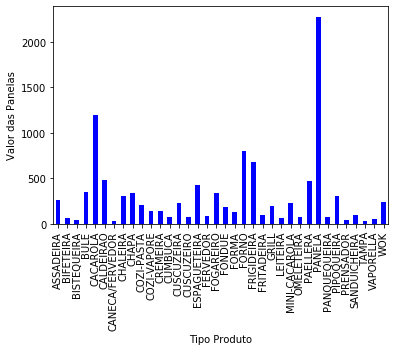

In [22]:

fig = tipo_teste['ITEM_PRICE'].max().plot.bar(color ="blue")
fig.set_ylabel('Valor das Panelas')
fig.set_xlabel('Tipo Produto')
plt.rc('figure',figsize = (10, 10))

Text(0.5, 0, 'Tipo Produto')

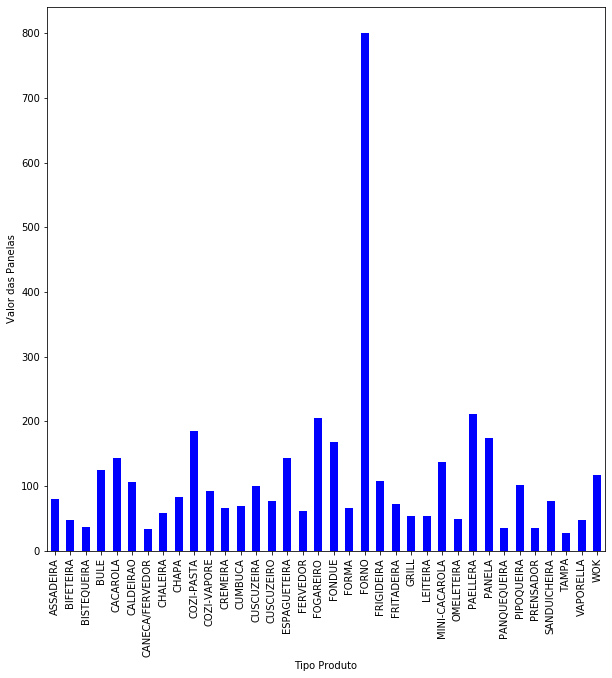

In [23]:
fig = tipo_teste['ITEM_PRICE'].mean().plot.bar(color ="blue")
fig.set_ylabel('Valor das Panelas')
fig.set_xlabel('Tipo Produto')

In [24]:
df_tratado.head()

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,0.0,ALUMINIO,VINHO,NAO INFORMADO,14.0,LA CUISINE,NAO INFORMADO,NAO INFORMADO,...,50,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.99,0.0
1,238630912,22.0,0.0,ALUMINIO,COLORIDO,NAO INFORMADO,24.0,TRAMONTINA,No,no,...,40,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.11,0.0
2,218228122,24.0,0.0,INOX,INOX,NAO INFORMADO,20.0,LA CUISINE,Yes,no,...,20,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.99,0.0
3,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NAO INFORMADO,...,47,0.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,637.759106,103.29,1.0
4,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NAO INFORMADO,...,47,0.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,478.531428,103.33,0.0


##### Aqui vemos que quanto mais caro o produto temos uma perda de interrese das pessoas 

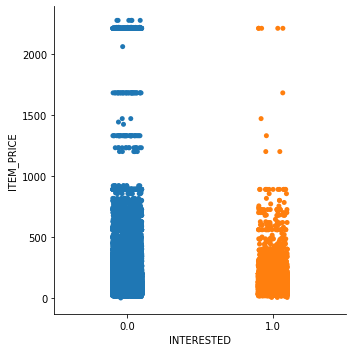

In [25]:
interrese_preco=sns.catplot(x='INTERESTED', y='ITEM_PRICE',data=df_tratado)
print(interrese_preco)

Oque as melhores panelas tem de feedback
1- constatado que temos 

In [26]:
bem_avaliado=df_tratado.loc[df_tratado['INTERESTED']==1].shape
print('Temos um total de {} tipos de produtos que foram bem avaliados'.format(bem_avaliado))

Temos um total de (15527, 21) tipos de produtos que foram bem avaliados


In [27]:
positivos=df_tratado.loc[df_tratado['INTERESTED']==1]

In [28]:
panelas_positivas=positivos.loc[positivos['TIPO_PRODUTO']=='PANELA']

In [29]:
panelas_positivas


,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
9,227368822,42.7,4.5,ALUMINIO,CEREJA,REDONDO,32.7,TRAMONTINA,Yes,no,...,18.1,12.0,NAO,NAO,0.0,PANELA,SIM,14.583125,89.90,1.0
38,254633548,30.5,0.0,ALUMINIO,AMARELO,REDONDO,14.0,LA CUISINE,NAO INFORMADO,NAO INFORMADO,...,50,3.0,NAO,SIM,1.0,PANELA,NAO,242.958535,179.99,1.0
68,256737590,19.6,4.5,ALUMINIO,VERMELHO,REDONDO,21.0,LA CUISINE,NAO INFORMADO,NAO INFORMADO,...,41,3.0,NAO,NAO,0.0,PANELA,NAO,613.675926,89.99,1.0
83,256737590,19.6,4.5,ALUMINIO,VERMELHO,REDONDO,21.0,LA CUISINE,NAO INFORMADO,NAO INFORMADO,...,41,3.0,NAO,NAO,0.0,PANELA,NAO,227.464185,89.99,1.0
191,227368874,46.7,4.5,ALUMINIO,CEREJA,REDONDO,36.7,TRAMONTINA,Yes,no,...,19.8,12.0,NAO,NAO,0.0,PANELA,SIM,115.937799,153.88,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180107,227368874,46.7,4.5,ALUMINIO,CEREJA,REDONDO,36.7,TRAMONTINA,Yes,no,...,19.8,12.0,NAO,NAO,0.0,PANELA,SIM,559.399630,125.50,1.0
180213,264220456,30.5,0.0,ALUMINIO,VINHO,NAO INFORMADO,14.0,LA CUISINE,NAO INFORMADO,NAO INFORMADO,...,50,3.0,NAO,SIM,1.0,PANELA,NAO,465.371320,199.99,1.0
180215,238630860,12.2,4.5,ALUMINIO,COLORIDO,NAO INFORMADO,34.2,TRAMONTINA,No,no,...,34.7,12.0,NAO,NAO,1.0,PANELA,SIM,423.116016,148.45,1.0
180223,223404128,0.0,3.0,CERAMICA,CHOCOLATE,REDONDO,0.0,CERAFLAME,Yes,yes,...,NAO INFORMADO,3.0,NAO,NAO,0.0,PANELA,SIM,217.619451,363.03,1.0


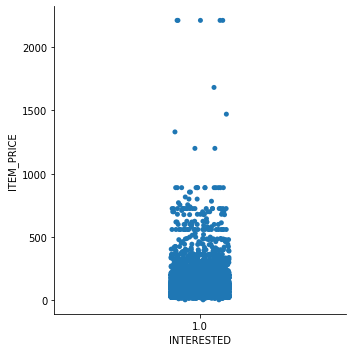

In [30]:
#Aqui vemos novamente que a media de produtos está em 0 a 500
sns.catplot(x='INTERESTED', y='ITEM_PRICE', data=positivos)

###### Melhor investir em panelas entre 0 a 500

##### 

#### Qual o produto melhor avaliado 

In [31]:
products_count = df['TIPO_PRODUTO'].value_counts()

In [32]:
products_count.index

Index(['PANELA', 'PIPOQUEIRA', 'CHALEIRA', 'CACAROLA', 'FRIGIDEIRA',
       'ESPAGUETEIRA', 'CUSCUZEIRA', 'CHAPA', 'WOK', 'CALDEIRAO', 'FERVEDOR',
       'GRILL', 'PAELLERA', 'BIFETEIRA', 'BULE', 'PANQUEQUEIRA', 'LEITEIRA',
       'FORMA', 'FRITADEIRA', 'OMELETEIRA', 'COZI-VAPORE', 'FOGAREIRO',
       'ASSADEIRA', 'MINI-CACAROLA', 'CREMEIRA', 'SANDUICHEIRA', 'TAMPA',
       'FONDUE', 'CUMBUCA', 'PRENSADOR', 'FORNO', 'COZI-PASTA', 'CUSCUZEIRO',
       'PAPEIRO', 'CANECA/FERVEDOR', 'VAPORELLA', 'BISTEQUEIRA', 'CANECO'],
      dtype='object')

In [33]:
products_count.values

array([62418, 28247, 17386, 16672, 16325,  8062,  6852,  5028,  4829,
        2537,  2387,  1156,   821,   745,   744,   703,   695,   608,
         552,   504,   496,   421,   371,   354,   303,   242,   185,
         141,   119,   102,    88,    67,    49,    35,    13,     7,
           6,     5], dtype=int64)

In [34]:
products_count_df = pd.DataFrame(products_count)

In [35]:
products_count_df.reset_index(inplace=True)

In [36]:
products_count_df

,index,TIPO_PRODUTO
0,PANELA,62418
1,PIPOQUEIRA,28247
2,CHALEIRA,17386
3,CACAROLA,16672
4,FRIGIDEIRA,16325
5,ESPAGUETEIRA,8062
6,CUSCUZEIRA,6852
7,CHAPA,5028
8,WOK,4829
9,CALDEIRAO,2537


In [37]:
teste=[df.loc[df['TIPO_PRODUTO'].value_counts()]]

In [38]:
ratings = df[['TIPO_PRODUTO', 'INTERESTED']]

In [39]:
df[['TIPO_PRODUTO', 'INTERESTED']]

,TIPO_PRODUTO,INTERESTED
0,PANELA,0.0
1,PIPOQUEIRA,0.0
2,ESPAGUETEIRA,0.0
3,PIPOQUEIRA,1.0
4,PIPOQUEIRA,0.0
...,...,...
180270,PANELA,1.0
180271,ESPAGUETEIRA,0.0
180272,CHALEIRA,0.0
180273,PIPOQUEIRA,0.0


In [40]:
ratings = ratings.groupby(by='TIPO_PRODUTO').sum()
#merge

In [41]:
ratings

,INTERESTED
TIPO_PRODUTO,
ASSADEIRA,40.0
BIFETEIRA,44.0
BISTEQUEIRA,1.0
BULE,30.0
CACAROLA,1507.0
CALDEIRAO,329.0
CANECA/FERVEDOR,0.0
CANECO,0.0
CHALEIRA,1929.0


In [42]:
ratings.reset_index(inplace=True)

In [43]:
products_count_df.merge(ratings, left_on='index', right_on='TIPO_PRODUTO')

,index,TIPO_PRODUTO_x,TIPO_PRODUTO_y,INTERESTED
0,PANELA,62418,PANELA,5347.0
1,PIPOQUEIRA,28247,PIPOQUEIRA,2659.0
2,CHALEIRA,17386,CHALEIRA,1929.0
3,CACAROLA,16672,CACAROLA,1507.0
4,FRIGIDEIRA,16325,FRIGIDEIRA,1256.0
5,ESPAGUETEIRA,8062,ESPAGUETEIRA,576.0
6,CUSCUZEIRA,6852,CUSCUZEIRA,485.0
7,CHAPA,5028,CHAPA,243.0
8,WOK,4829,WOK,255.0
9,CALDEIRAO,2537,CALDEIRAO,329.0


# Machine Learn 

In [44]:
#pacote de dados
from sklearn.svm import LinearSVC
from sklearn import preprocessing
#aqui eu altero os valores strings para int com essse pacote
from sklearn.preprocessing import LabelEncoder 



## Normalização dos Dados  

1- Tranformação das variáveis qualitativas

In [45]:
#Criando um variavel que recebe o metodo label
le = LabelEncoder () 

In [46]:
#Adicionando uma nova coluna ao meu data frame já tratado com o fit para alterar as strings por numeros 
df['id_produto'] = le.fit_transform (df['TIPO_PRODUTO'])
df['id_marca'] = le.fit_transform (df['MARCA']) 
df['id_composicao'] = le.fit_transform (df['COMPOSICAO']) 
df['id_cor'] = le.fit_transform (df['COR']) 
df['WOK'] = le.fit_transform (df['TIPO_WOK'])

## TODO: Melhorar o code com um loop



2- Divisão de X e Y

In [47]:
#Criação do DF com o EIXO X
X = df.drop(columns=['INTERESTED','COMPOSICAO','COR','FORMATO','MARCA','PARA_LAVA_LOUCAS',
                           'PARA_MICRO_ONDAS','PROFUNDIDADE','TEM_FERRO_FUNDIDO','TEM_GRELHA',
                           'TIPO_PRODUTO', 'TIPO_WOK','SESSION_ID','PESO'])


In [48]:
X

,ITEM_ID,ALTURA,CAPACIDADE_(L),LARGURA,TEMPO_GARANTIA,TEM_TAMPA,ITEM_PRICE,id_produto,id_marca,id_composicao,id_cor,WOK
0,264220456,30.5,0.0,14.0,3.0,1.0,199.99,29,20,1,24,0
1,238630912,22.0,0.0,24.0,12.0,1.0,105.11,32,32,1,9,0
2,218228122,24.0,0.0,20.0,3.0,1.0,139.99,16,20,3,13,0
3,253661510,49.5,6.0,41.5,0.0,1.0,103.29,32,32,1,23,0
4,253661510,49.5,6.0,41.5,0.0,1.0,103.33,32,32,1,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
180270,264220456,30.5,0.0,14.0,3.0,1.0,199.99,29,20,1,24,0
180271,257484236,0.0,0.0,0.0,0.0,0.0,0.00,16,24,4,16,0
180272,256719114,16.0,0.0,18.5,6.0,0.0,35.05,8,34,3,13,0
180273,253661510,49.5,6.0,41.5,0.0,1.0,105.12,32,32,1,23,0


In [49]:
#Criação do DF com o EIXO Y
y = df['INTERESTED']
y

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
180270    1.0
180271    0.0
180272    0.0
180273    0.0
180274    0.0
Name: INTERESTED, Length: 180275, dtype: float64

3- Padronização dos dados.


In [50]:
#from sklearn.preprocessing import StandardScaler

In [51]:
#sc = StandardScaler()

In [52]:
#sc.fit(X)

In [53]:
#X= sc.transform(X)

In [54]:
#X

In [55]:
#abc = pd.DataFrame(X)

In [56]:
#abc

In [57]:
#X=abc

In [58]:
#X

### Porque comentei tudo fiz testes como as variaveis normalizadas e não teve nenhuma diferenção  

4- Divisão teste e treino

In [59]:
# Alternativa a linha abaixo:

from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
print(X_train.shape[0] / df.shape[0] *100)
print(X_test.shape[0] / df.shape[0] *100)

69.99972264595756
30.00027735404244


# Teste 1- Modelo Linear 

In [62]:
model = LinearSVC()


In [63]:
model.fit(X_train, y_train)

C:\Users\guilherme.berthlot\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [64]:
y_hat = model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(classification_report(y_test,y_hat))

C:\Users\guilherme.berthlot\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96     49455
         1.0       0.00      0.00      0.00      4628

    accuracy                           0.91     54083
   macro avg       0.46      0.50      0.48     54083
weighted avg       0.84      0.91      0.87     54083



<img src="https://miro.medium.com/max/356/1*Z54JgbS4DUwWSknhDCvNTQ.png">

In [67]:
print(confusion_matrix(y_test, y_hat))

[[49455     0]
 [ 4628     0]]


### obsevações Primeiro teste

Constatado que no modelo linear não é o melhor para ser utilizado nesse modelo pois temos varias variaveis. 

# Teste 2 - KNN



Explicar oque esse este modelo 

In [68]:
#Importando Biblioteca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [69]:
#Aqui eu chuetei que o padrão de vizinhos seriam de 3 casas
knn = KNeighborsClassifier (n_neighbors = 3)


X_train, X_test, y_train, y_test

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [71]:
#Aqui eu treino meu modelo 
y_pred = knn.predict(X_test)

In [72]:
print(confusion_matrix(y_test, y_pred))

[[48255  1200]
 [ 3479  1149]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     49455
         1.0       0.49      0.25      0.33      4628

    accuracy                           0.91     54083
   macro avg       0.71      0.61      0.64     54083
weighted avg       0.89      0.91      0.90     54083



#### Realizada uma valiação para identificar qual será o meu K

In [74]:
for k in range(1,11):
    print("K =",k)
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('Acurácia do modelo para K={}: {} %'.format(k,round(accuracy_score(y_test,y_pred), ndigits=2)))
    print('------------------------------------')

K = 1
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     49455
         1.0       0.30      0.36      0.33      4628

    accuracy                           0.87     54083
   macro avg       0.62      0.64      0.63     54083
weighted avg       0.88      0.87      0.88     54083

[[45636  3819]
 [ 2978  1650]]
Acurácia do modelo para K=1: 0.87 %
------------------------------------
K = 2
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     49455
         1.0       0.58      0.23      0.33      4628

    accuracy                           0.92     54083
   macro avg       0.75      0.61      0.64     54083
weighted avg       0.90      0.92      0.90     54083

[[48687   768]
 [ 3581  1047]]
Acurácia do modelo para K=2: 0.92 %
------------------------------------
K = 3
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     49455
         1.

Agora Vamos análisar com o valor de K

In [75]:
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

NameError: name 'np' is not defined

In [ ]:
error_rate

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')